<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

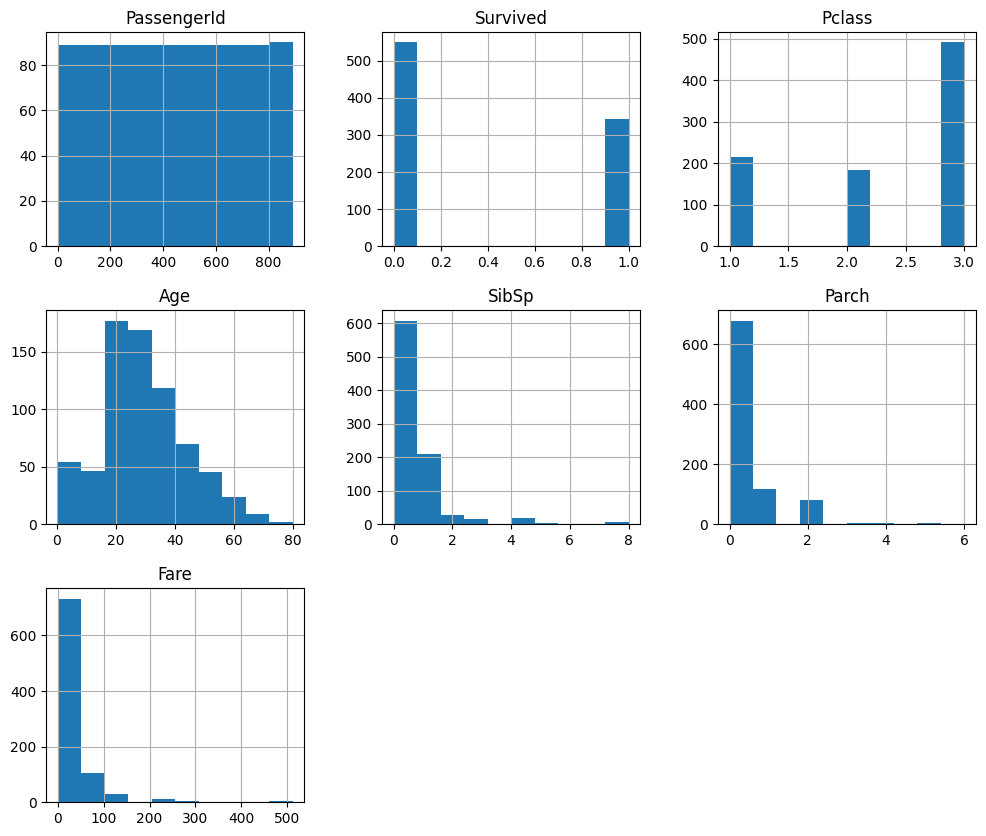

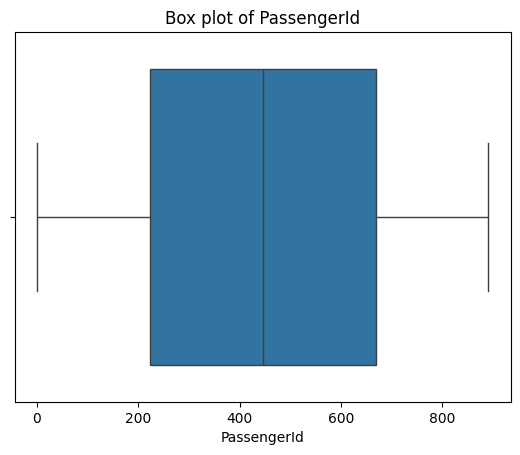

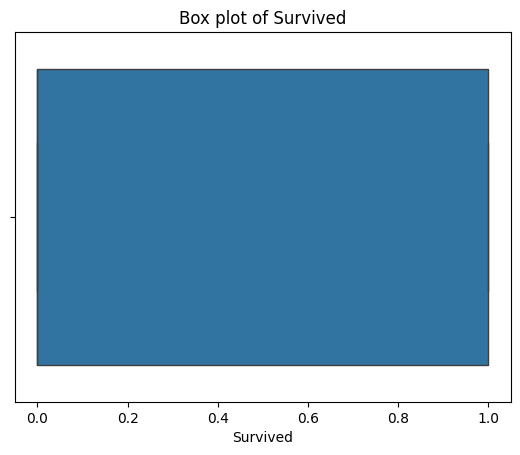

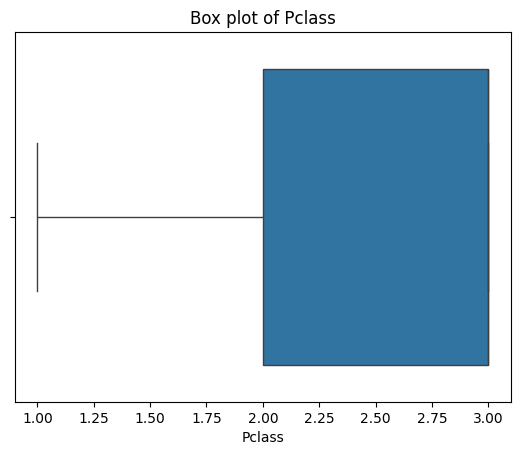

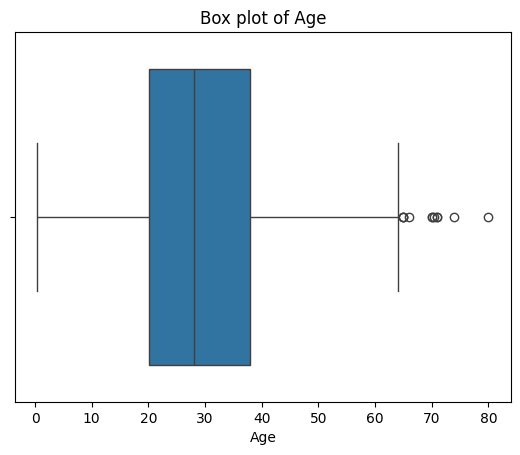

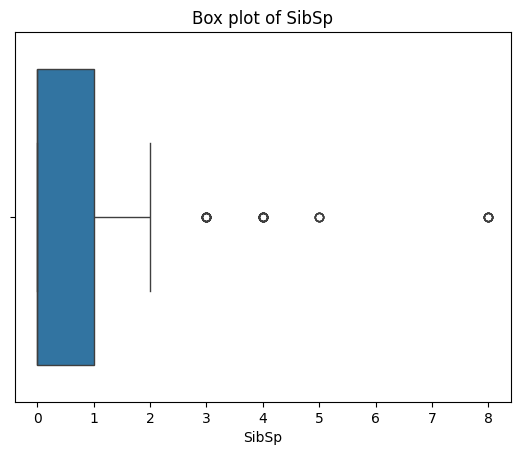

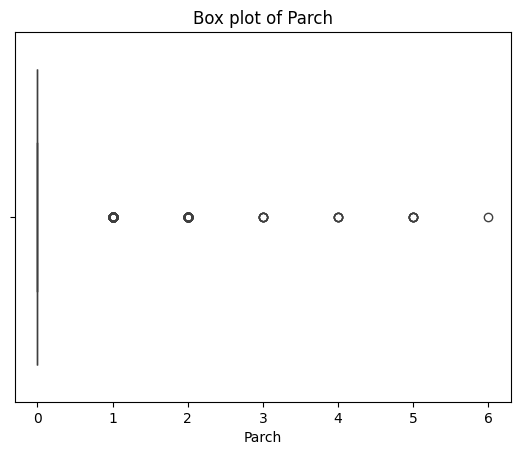

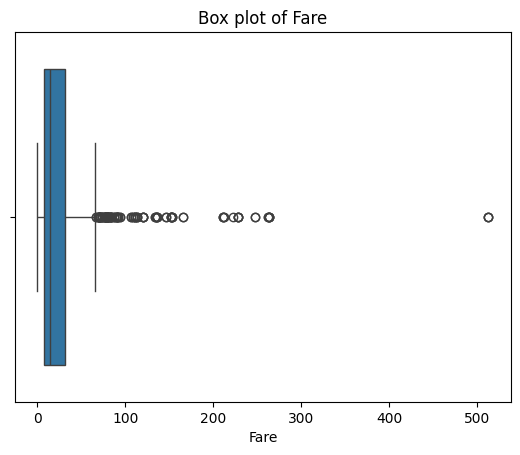

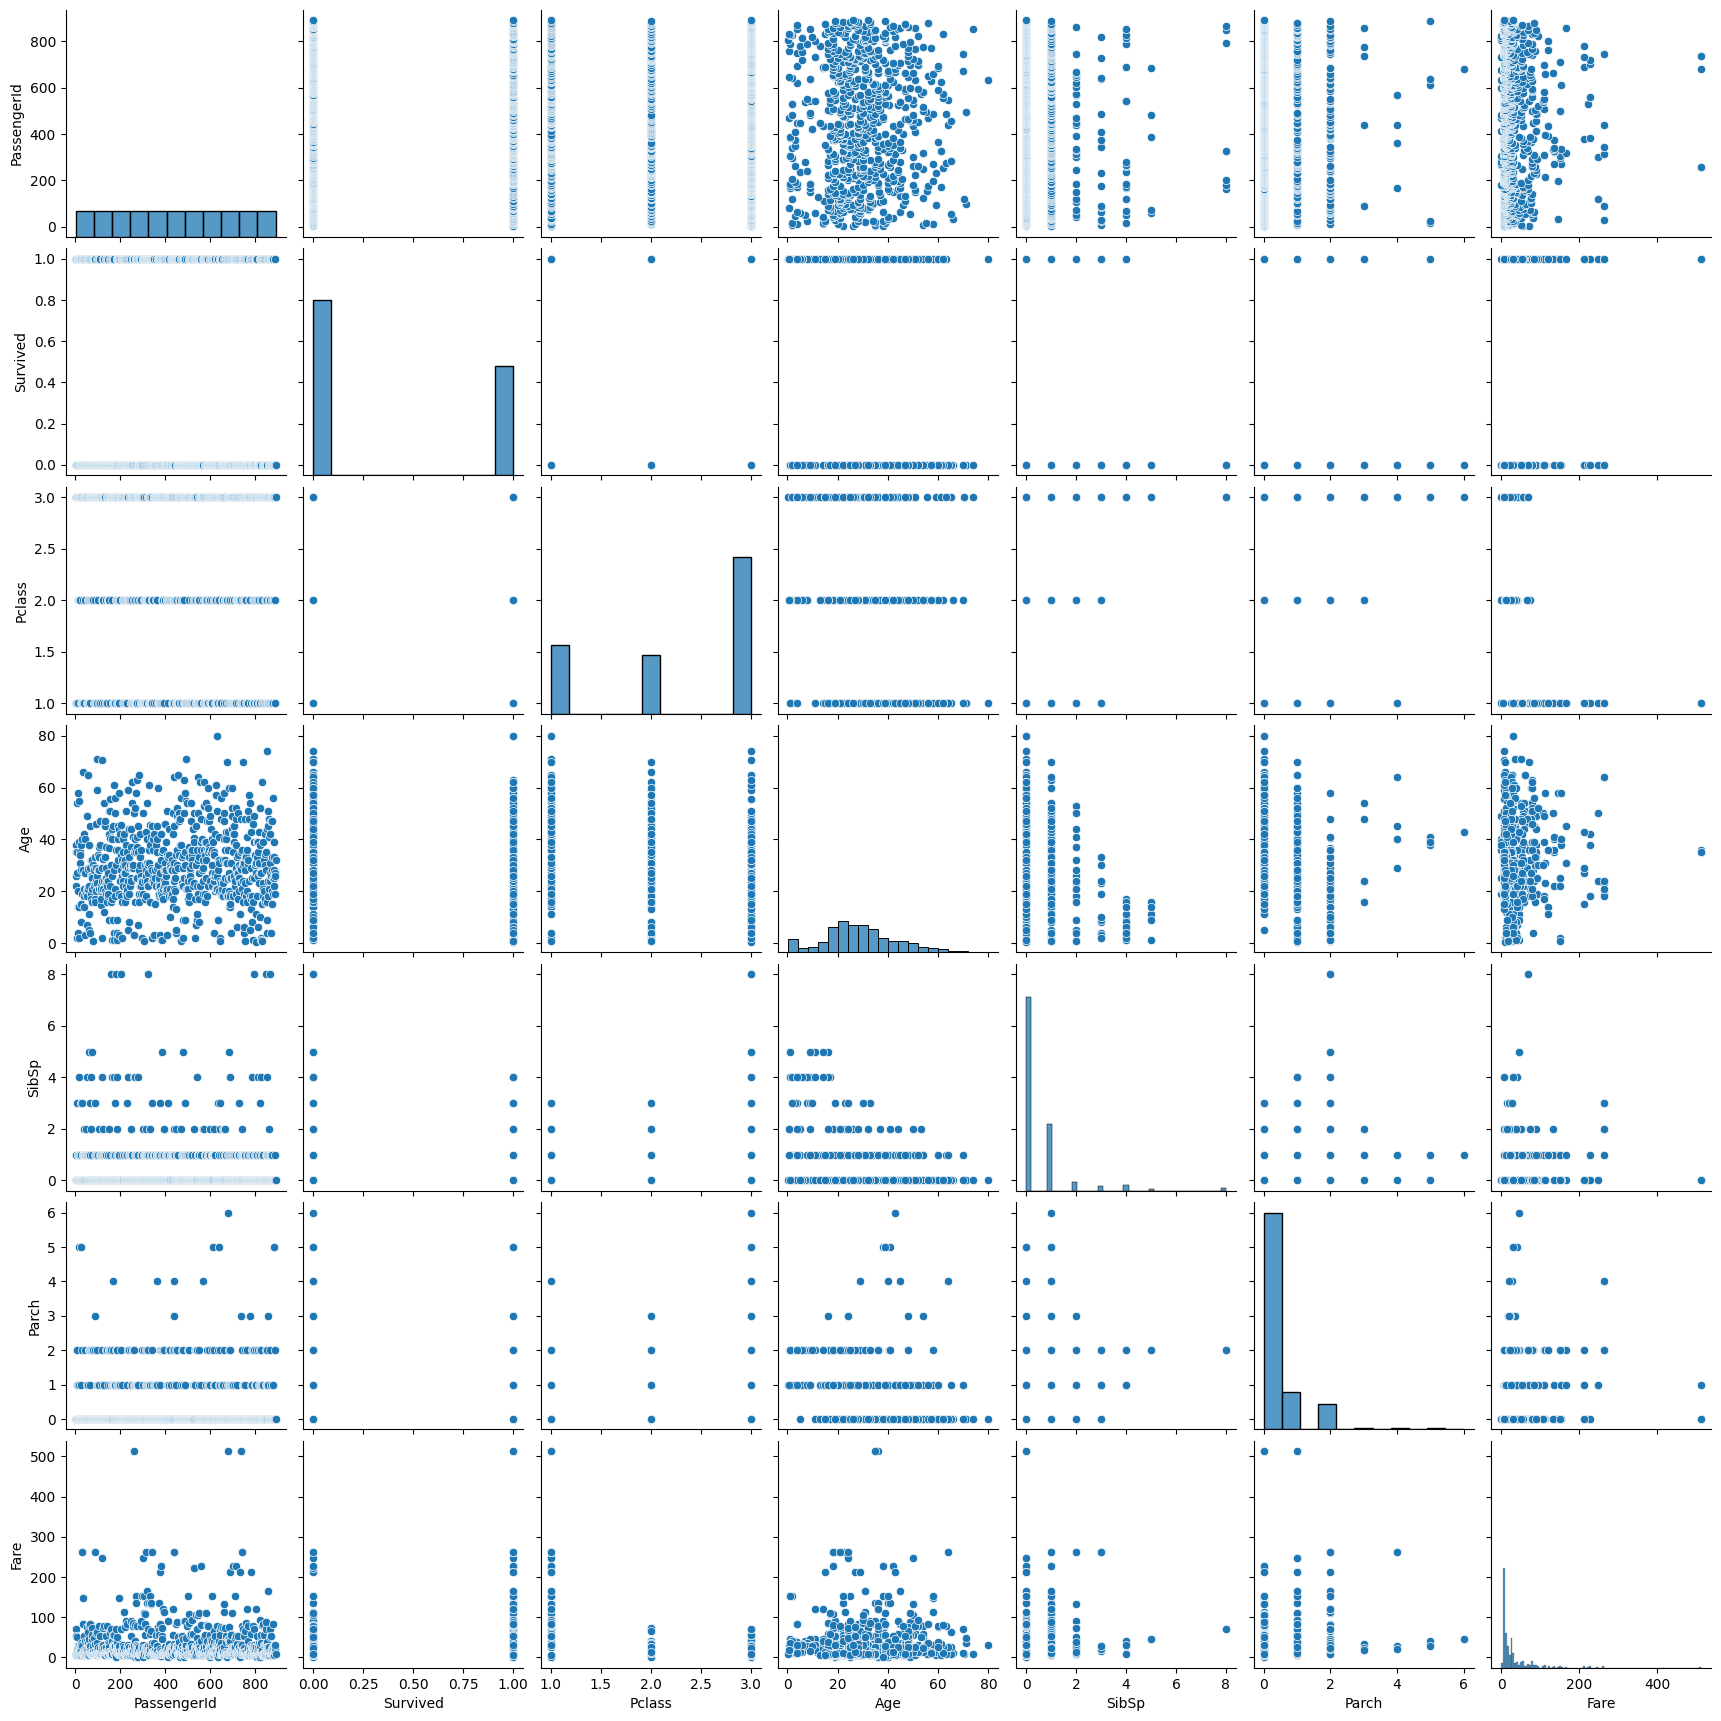

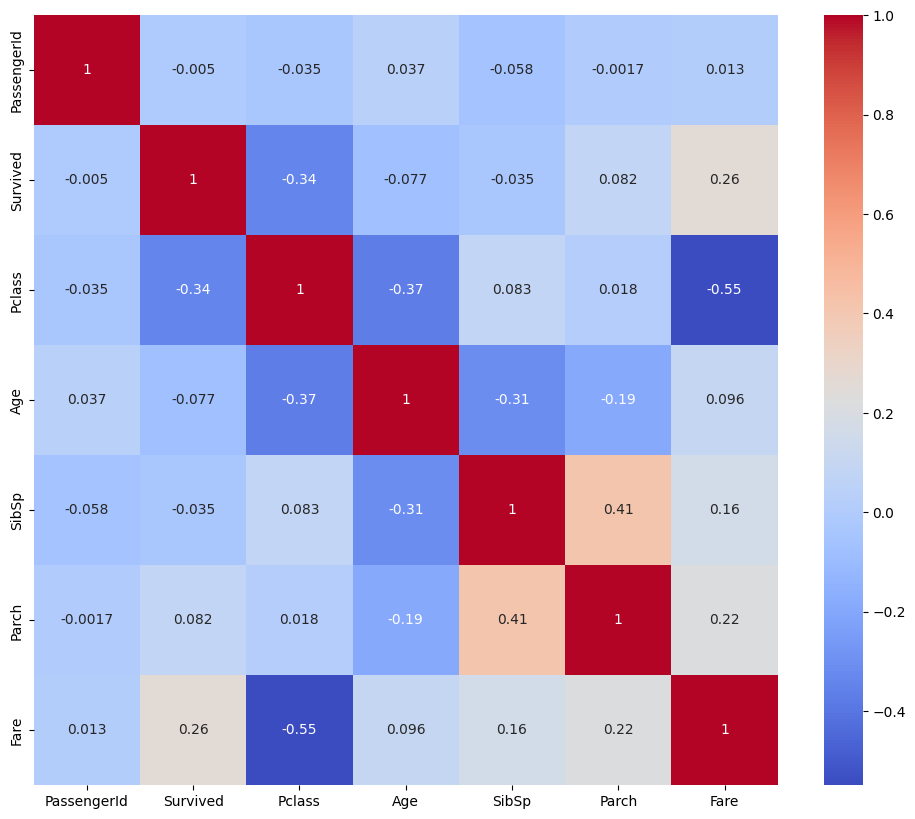

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Titanic_train.csv')

# Display the first few rows of the dataset
print(data.head())

# Get information about the features, including their data types
print(data.info())

# Generate descriptive statistics for numerical features
print(data.describe())

# Visualize the distribution of features using histograms
data.hist(figsize=(12, 10))
plt.show()

# Create box plots to visualize the distribution of numerical features
for column in data.select_dtypes(include=['number']):
  plt.figure()
  sns.boxplot(x=data[column])
  plt.title(f'Box plot of {column}')
  plt.show()

# Create pair plots to visualize the relationships between features
sns.pairplot(data)
plt.show()

# Calculate the correlation matrix
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
import pandas as pd
# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())

# Check if 'Embarked' column exists before filling missing values
if 'Embarked' in data.columns:
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
else:
    print("Column 'Embarked' not found in the DataFrame.")
    # Handle the case where 'Embarked' column is missing, e.g., skip or create the column

# Encode categorical variables using one-hot encoding
# Check if columns exist before applying get_dummies
columns_to_encode = ['Sex', 'Embarked']
existing_columns = [col for col in columns_to_encode if col in data.columns]
if existing_columns:
    data = pd.get_dummies(data, columns=existing_columns, drop_first=True)
else:
    print("None of the specified columns were found in the DataFrame for encoding.")
    # Handle the case where none of the columns exist, e.g., skip or create the columns

# Drop irrelevant columns if they exist
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
if existing_columns_to_drop:
    data.drop(existing_columns_to_drop, axis=1, inplace=True)
else:
    print("None of the specified columns were found in the DataFrame to drop.")
    # Handle the case where none of the columns exist, e.g., skip or create the columns


# Display the updated dataset
print(data.head())
print(data.info())

Column 'Embarked' not found in the DataFrame.
None of the specified columns were found in the DataFrame for encoding.
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500       False      True   
1         1       1  38.0      1      0  71.2833        True     False   
2         1       3  26.0      0      0   7.9250        True     False   
3         1       1  35.0      1      0  53.1000        True     False   
4         0       3  35.0      0      0   8.0500       False      True   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survi

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1-score: 0.75
ROC-AUC: 0.8797940797940799


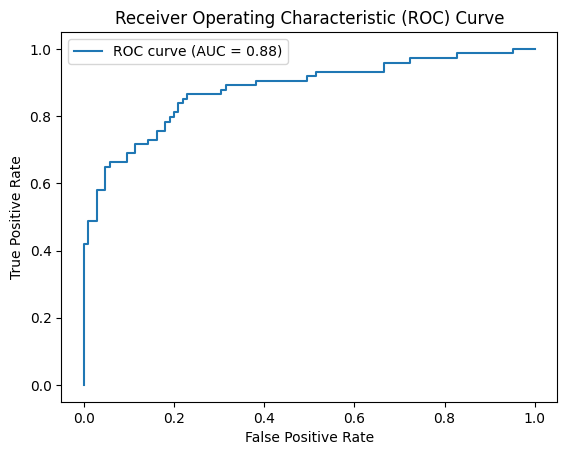

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'Survived' is the target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate predicted probabilities for ROC-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
print("Logistic Regression Coefficients:")
for feature, coefficient in zip(X.columns, model.coef_[0]):
  print(f"{feature}: {coefficient}")
  pickle.dump(model, open('logistic_regression_model.pkl', 'wb'))


Logistic Regression Coefficients:
Pclass: -0.9055313828975791
Age: -0.027821152067415644
SibSp: -0.29159945536083354
Parch: -0.09328718501071699
Fare: 0.0026167928383909185
Sex_female: 2.0655415767337733
Sex_male: -0.5843054921882642
Embarked_C: 0.7787631438560083
Embarked_Q: 0.47965125726990104
Embarked_S: 0.2228216834193043


In [ ]:
import pandas as pd
import pickle

# Load test data
test_data = pd.read_csv('/content/Titanic_test.csv').copy()

# Fill missing values safely
test_data.loc[:, 'Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data.loc[:, 'Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data.loc[:, 'Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# One-hot encoding
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

# Ensure test data has the same features as training data
expected_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

for col in expected_columns:
    if col not in test_data.columns:
        test_data[col] = 0

test_data = test_data[expected_columns]  # Ensure correct column order

# Load trained model
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Make predictions
test_predictions = model.predict(test_data)

Precision measures the accuracy of positive predictions (TP / (TP + FP)), indicating how many predicted positives are actually correct.

Recall measures the ability to find all actual positives (TP / (TP + FN)), showing how many actual positives were correctly identified.

Precision prioritizes correctness; recall prioritizes completeness.

Cross-validation is a technique to assess model performance by splitting data into multiple training and validation sets. It helps prevent overfitting and ensures the model generalizes well to unseen data. In binary classification, it improves reliability by evaluating performance across different subsets, reducing bias from a single train-test split.